/Users/carlotahuertas/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/carlotahuertas/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/carlotahuertas/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/carlotahuertas/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default 

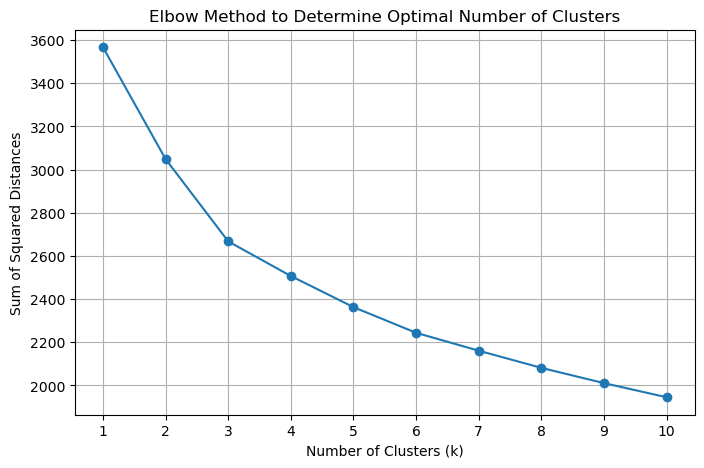

/Users/carlotahuertas/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


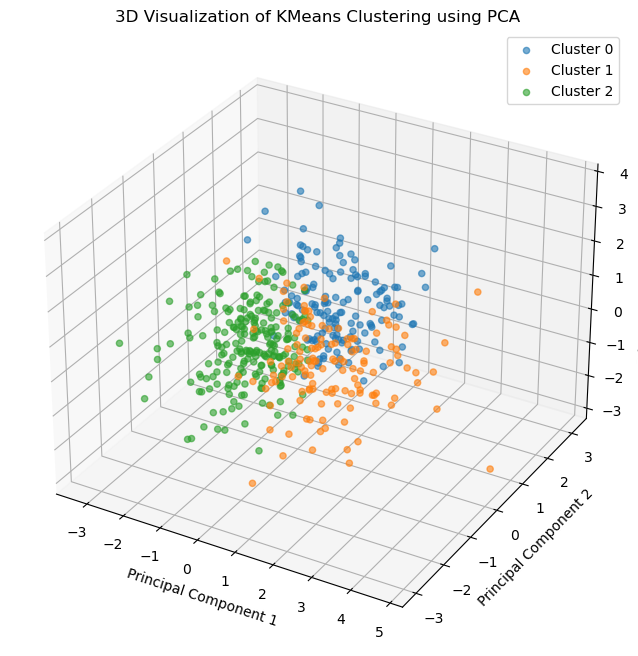

KMeans Silhouette Score: 0.14742523933031118

Cluster Analysis and Relevant Features:

Cluster 0:
  Cholesterol: -1.10
  Sex_M: 0.94
  ChestPainType_ASY: 0.79
  ST_Slope_Flat: 0.76
  MaxHR: -0.66

Cluster 1:
  Age: -0.93
  MaxHR: 0.93
  Sex_M: 0.90
  RestingECG_Normal: 0.70
  ChestPainType_ASY: 0.69

Cluster 2:
  Sex_M: 0.88
  ExerciseAngina_Y: 0.82
  ST_Slope_Flat: 0.81
  ChestPainType_ASY: 0.81
  Cholesterol: 0.65

Cluster Centers in Original Scale:

Cluster 0:
  Age: 59.28
  RestingBP: 133.26
  Cholesterol: 36.79
  MaxHR: 112.17
  Oldpeak: 0.76
  Sex_F: 0.06
  Sex_M: 0.94
  ChestPainType_ASY: 0.79
  ChestPainType_ATA: 0.03
  ChestPainType_NAP: 0.16
  ChestPainType_TA: 0.02
  RestingECG_LVH: 0.11
  RestingECG_Normal: 0.62
  RestingECG_ST: 0.27
  ExerciseAngina_N: 0.42
  ExerciseAngina_Y: 0.58
  ST_Slope_Down: 0.10
  ST_Slope_Flat: 0.76
  ST_Slope_Up: 0.15

Cluster 1:
  Age: 47.81
  RestingBP: 121.85
  Cholesterol: 190.57
  MaxHR: 149.28
  Oldpeak: 0.75
  Sex_F: 0.10
  Sex_M: 0.90
  C

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the heart disease dataset
file_path = '/Users/carlotahuertas/Desktop/CS4641/heart_disease_only.csv' # Update the path to your dataset file
heart_data = pd.read_csv(file_path)

# Preprocess the data: One-hot encoding for categorical features
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
one_hot_encoder = OneHotEncoder()
encoded_categorical = one_hot_encoder.fit_transform(heart_data[categorical_features]).toarray()

# Standardize the numerical features
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(heart_data[numerical_features])

# Combine encoded categorical and scaled numerical data
processed_data = np.hstack((scaled_numerical, encoded_categorical))

# Elbow Method to Determine Optimal Number of Clusters
sum_of_squared_distances = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(processed_data)
    sum_of_squared_distances.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, sum_of_squared_distances, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xticks(K_range)
plt.grid(True)
plt.show()

# KMeans Clustering using sklearn
optimal_k = 3  # Set based on the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(processed_data)
kmeans_silhouette = silhouette_score(processed_data, kmeans_labels)

#PCA 
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components=3)
reduced_data_3d = pca.fit_transform(processed_data)

# 3D Scatter plot of the KMeans clustering results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster in range(optimal_k):
    ax.scatter(
        reduced_data_3d[kmeans_labels == cluster, 0],
        reduced_data_3d[kmeans_labels == cluster, 1],
        reduced_data_3d[kmeans_labels == cluster, 2],
        label=f'Cluster {cluster}',
        alpha=0.6
    )

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Visualization of KMeans Clustering using PCA')
ax.legend()
plt.show()


# Silhouette Score
print("KMeans Silhouette Score:", kmeans_silhouette)

# Analyze the most relevant features for each cluster
cluster_centers = kmeans.cluster_centers_
feature_names = numerical_features + list(one_hot_encoder.get_feature_names_out(categorical_features))

# Output the most relevant features for each cluster
print("\nCluster Analysis and Relevant Features:")
for i, center in enumerate(cluster_centers):
    print(f"\nCluster {i}:")
    # Sort features by their absolute values to find the most influential ones
    sorted_features = sorted(zip(feature_names, center), key=lambda x: abs(x[1]), reverse=True)
    for feature, value in sorted_features[:5]:  # Top 5 most relevant features
        print(f"  {feature}: {value:.2f}")

# Reverse the standardization for interpretability
original_numerical_centers = scaler.inverse_transform(cluster_centers[:, :len(numerical_features)])
reversed_cluster_centers = np.hstack((original_numerical_centers, cluster_centers[:, len(numerical_features):]))
print("\nCluster Centers in Original Scale:")
for i, center in enumerate(reversed_cluster_centers):
    print(f"\nCluster {i}:")
    for feature, value in zip(feature_names, center):
        print(f"  {feature}: {value:.2f}")

